# Intrepret First order ODE as a Filter 

In [1]:
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sympy as sym
from sympy.abc import w, a, t, x, s, X, g, G, v

print(sym.__version__)
init_printing(use_unicode=True)

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, arg, atan2, re, cos, exp_polar, pi
from sympy.abc import A,B,t,f 

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()

1.8


In [2]:
# define some variables we can use
v, g, X = symbols('v g X', cls = Function)
t = Symbol('t', positive=True)
a = Symbol('a', positive=True)
w = Symbol('w', positive=True)

## Define the ODE

Conisder a first order differerntial equation system driven by a sine input. 

System dynamics are determined by parameter $w>0$ while the input frequency is determined by $a>0$
$$
\frac{dv(t)}{dt} + w v(t) = \sin(at)
$$

**Question to address:** how does the size of $a > 0$ compared to $w > 0$ impact the output $v(t)$? 

In [3]:
eom  = Eq(v(t).diff(t) + w*v(t), w*sym.sin(a*t))

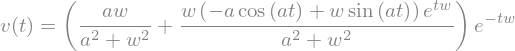

In [4]:
# solve the ODE
Vout = dsolve(eom,v(t), ics={v(0): 0})
Vout

Consider the two cases of $\frac{a}{w} \ll 1$ and $\frac{a}{w} \gg 1$ 

In [5]:
alow = 0.1
ahigh = 10
V_low_a = Vout.subs(w,1).subs(a,alow)
V_high_a = Vout.subs(w,1).subs(a,ahigh)

## Case 1: input frequency $a$ much lower than that of the systems, so $a/w \ll 1$

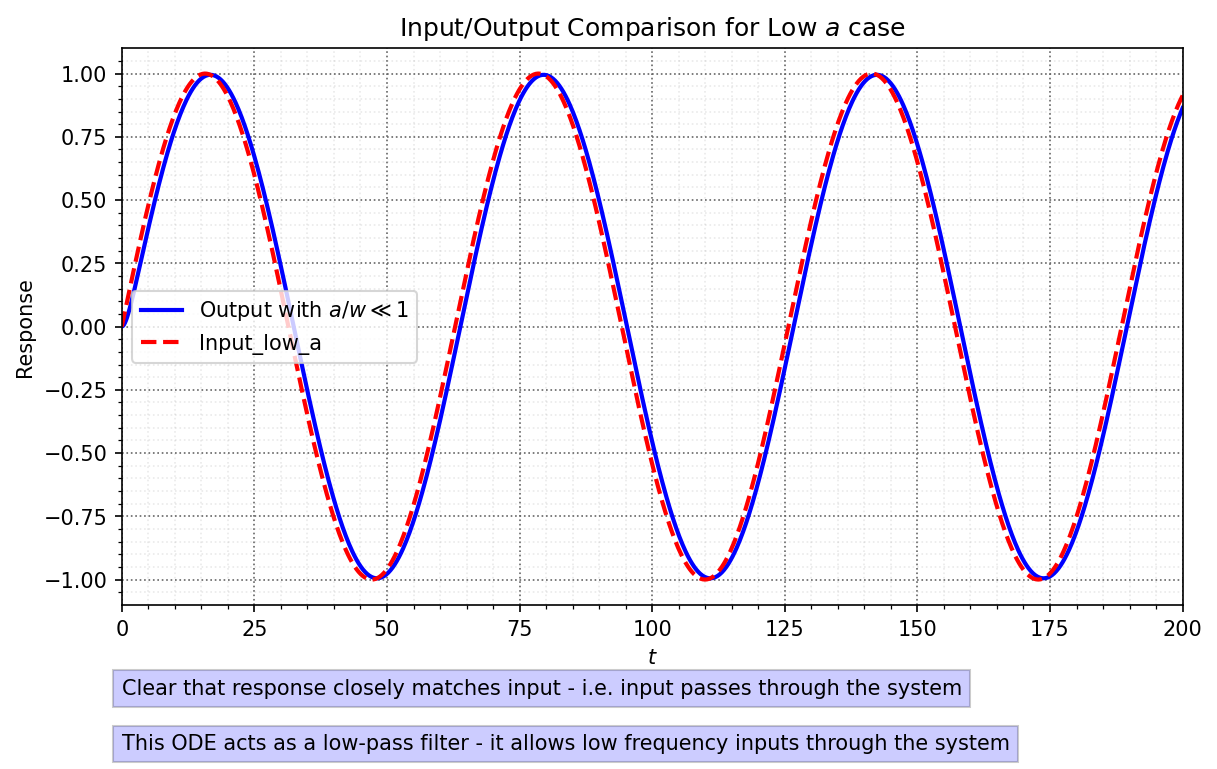

In [6]:
input_low_a = sym.sin(alow*t)
lam_p1 = lambdify(t, V_low_a.rhs, modules=['numpy'])
lam_p3 = lambdify(t, input_low_a, modules=['numpy'])

tlim = 200
tt = np.linspace(0, tlim, 1000)

fig, ax = plt.subplots(figsize=(8, 5),dpi=150)
plt.plot(tt, lam_p1(tt),'b',label='Output with $a/w \ll 1$')
plt.plot(tt, lam_p3(tt),'r--',label='Input_low_a')

plt.legend()
plt.xlim(0,tlim)
plt.xlabel('$t$')
plt.ylabel('Response')
plt.title('Input/Output Comparison for Low $a$ case')
nicegrid()

text1 = "Clear that response closely matches input - i.e. input passes through the system"
text2 = "This ODE acts as a low-pass filter - it allows low frequency inputs through the system"
plt.text(0., -0.15, text1, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='blue', alpha=0.2))
plt.text(0, -0.25, text2, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='blue', alpha=0.2))
plt.show()


## Case 2: input frequency $a$ much higher than that of the systems, so $a/w \gg 1$

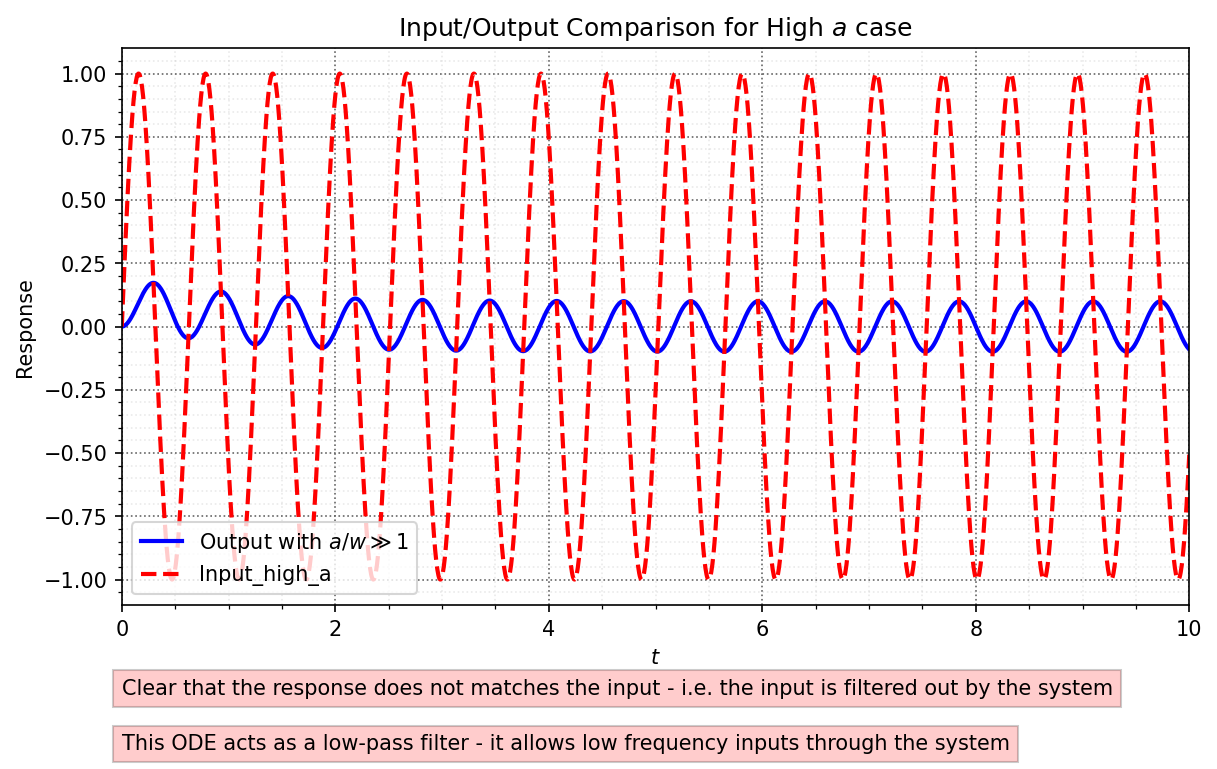

In [8]:
input_high_a = sym.sin(ahigh*t)

lam_p2 = lambdify(t, V_high_a.rhs, modules=['numpy'])
lam_p4 = lambdify(t, input_high_a, modules=['numpy'])

tlim = 10
tt = np.linspace(0, tlim, 2000)

fig, ax = plt.subplots(figsize=(8, 5),dpi=150)
plt.plot(tt, lam_p2(tt),'b',label='Output with $a/w \gg 1$')
plt.plot(tt, lam_p4(tt),'r--',label='Input_high_a')

plt.legend()
plt.xlim(0,tlim)
plt.xlabel('$t$')
plt.ylabel('Response')
plt.title('Input/Output Comparison for High $a$ case')
nicegrid()

text1 = "Clear that the response does not matches the input - i.e. the input is filtered out by the system"
text2 = "This ODE acts as a low-pass filter - it allows low frequency inputs through the system"
plt.text(0, -0.15, text1, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='red', alpha=0.2))
plt.text(0, -0.25, text2, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='red', alpha=0.2))
plt.show()